# Maxp Regionalization

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append("../")
import spopt

In [3]:
import geopandas as gpd
import libpysal
import numpy

In [4]:
from spopt.region import MaxPHeuristic as MaxP

##### Mexican State Regional Income Clustering

Cluster 32 Mexican states into the maximum number of regions such that each region as at least 5 states and homogeneity in per captia gross regional product over 1950-2000 is maximized.

<AxesSubplot:>

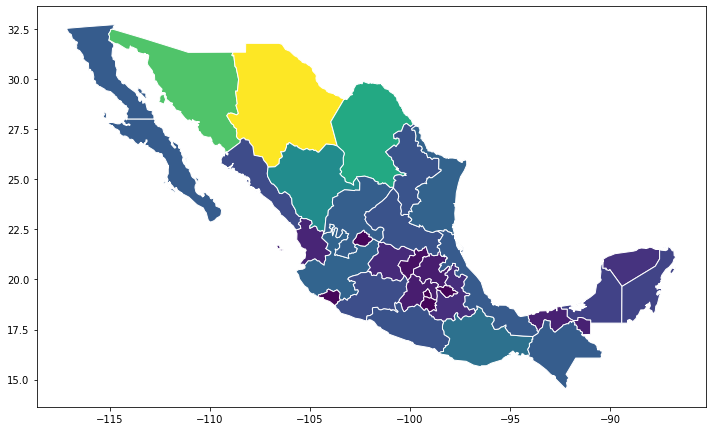

In [5]:
pth = libpysal.examples.get_path('mexicojoin.shp')

mexico = gpd.read_file(pth)

mexico.plot(column='AREA', figsize=(12,8), edgecolor='w')

In [6]:
mexico

,POLY_ID,AREA,CODE,NAME,PERIMETER,ACRES,HECTARES,PCGDP1940,PCGDP1950,PCGDP1960,...,GR9000,LPCGDP40,LPCGDP50,LPCGDP60,LPCGDP70,LPCGDP80,LPCGDP90,LPCGDP00,TEST,geometry
0,1,7.252751e+10,MX02,Baja California Norte,2040312.385,1.792187e+07,7.252751e+06,22361.0,20977.0,17865.0,...,0.05,4.35,4.32,4.25,4.40,4.47,4.43,4.48,1.0,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1,2,7.225988e+10,MX03,Baja California Sur,2912880.772,1.785573e+07,7.225988e+06,9573.0,16013.0,16707.0,...,0.00,3.98,4.20,4.22,4.39,4.46,4.41,4.42,2.0,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
2,3,2.731957e+10,MX18,Nayarit,1034770.341,6.750785e+06,2.731957e+06,4836.0,7515.0,7621.0,...,-0.05,3.68,3.88,3.88,4.04,4.13,4.11,4.06,3.0,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475..."
3,4,7.961008e+10,MX14,Jalisco,2324727.436,1.967200e+07,7.961008e+06,5309.0,8232.0,9953.0,...,0.03,3.73,3.92,4.00,4.21,4.32,4.30,4.33,4.0,"POLYGON ((-101.52490 21.85664, -101.58830 21.7..."
4,5,5.467030e+09,MX01,Aguascalientes,313895.530,1.350927e+06,5.467030e+05,10384.0,6234.0,8714.0,...,0.13,4.02,3.79,3.94,4.21,4.32,4.32,4.44,5.0,"POLYGON ((-101.84620 22.01176, -101.96530 21.8..."
5,6,3.034491e+10,MX11,Guanajuato,918758.241,7.498360e+06,3.034491e+06,4359.0,5686.0,8209.0,...,0.06,3.64,3.75,3.91,4.07,4.14,4.13,4.19,6.0,"POLYGON ((-100.28030 20.20451, -100.34860 20.0..."
6,7,1.203240e+10,MX22,Queretaro de Arteaga,619581.709,2.973259e+06,1.203240e+06,11016.0,5560.0,7110.0,...,0.07,4.04,3.75,3.85,4.15,4.30,4.35,4.42,7.0,"POLYGON ((-100.12280 19.93804, -100.18250 20.0..."
7,8,2.123533e+10,MX13,Hidalgo,953861.244,5.247343e+06,2.123533e+06,4414.0,5194.0,6399.0,...,-0.03,3.64,3.72,3.81,3.89,4.09,4.12,4.09,8.0,"POLYGON ((-98.65941 19.58540, -98.65556 19.595..."
8,9,5.947352e+10,MX16,Michoacan de Ocampo,1431015.877,1.469617e+07,5.947352e+06,3327.0,5272.0,5244.0,...,0.03,3.52,3.72,3.72,3.91,4.05,4.04,4.07,9.0,"POLYGON ((-103.47960 18.96722, -103.34830 18.9..."
9,10,2.147628e+10,MX15,Mexico,888381.807,5.306884e+06,2.147628e+06,3408.0,4972.0,9053.0,...,-0.06,3.53,3.70,3.96,4.23,4.30,4.27,4.21,10.0,"POLYGON ((-98.62798 19.47576, -98.66612 19.405..."


In [7]:
attrs_name = [f'PCGDP{year}' for year in range(1950,2010, 10)]
attrs_name

['PCGDP1950', 'PCGDP1960', 'PCGDP1970', 'PCGDP1980', 'PCGDP1990', 'PCGDP2000']

In [8]:
w = libpysal.weights.Queen.from_dataframe(mexico)
threshold = 5
top_n = 2
mexico['count'] = 1
threshold_name = 'count'

In [9]:
model = MaxP(mexico, w, attrs_name, threshold_name, threshold, top_n)
model.solve()
mexico['maxp_new'] = model.labels_

In [10]:
model.p

6

<AxesSubplot:>

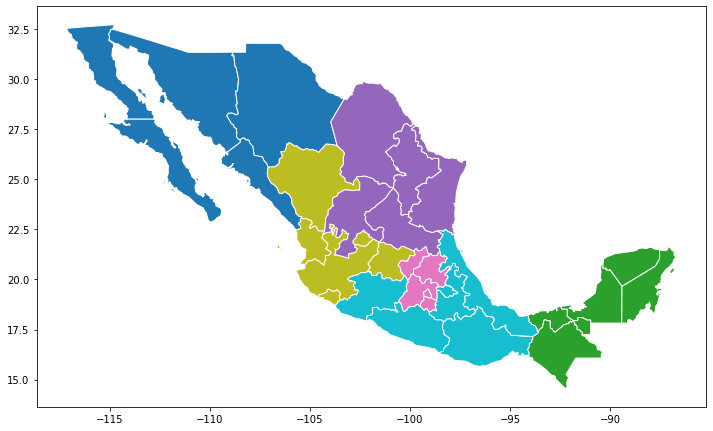

In [11]:
mexico.plot(column='maxp_new', categorical=True, figsize=(12,8), edgecolor='w')

## Change threshold to min of 3 states per region

In [12]:
numpy.random.seed(123456)
threshold=3
model = MaxP(mexico, w, attrs_name, threshold_name, threshold, top_n)
model.solve()

In [13]:
mexico['maxp_3'] = model.labels_
mexico.groupby(by='maxp_3').count()

,POLY_ID,AREA,CODE,NAME,PERIMETER,ACRES,HECTARES,PCGDP1940,PCGDP1950,PCGDP1960,...,LPCGDP50,LPCGDP60,LPCGDP70,LPCGDP80,LPCGDP90,LPCGDP00,TEST,geometry,count,maxp_new
maxp_3,,,,,,,,,,,,,,,,,,,,,
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
5,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
6,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
7,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
8,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
9,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [14]:
model.p

10

<AxesSubplot:>

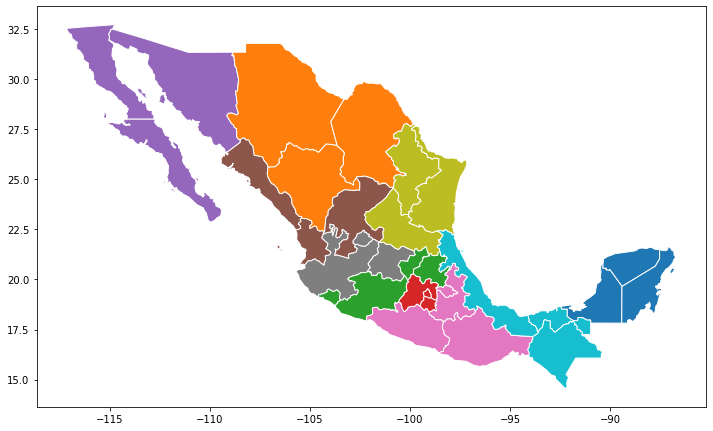

In [15]:
mexico.plot(column='maxp_3', categorical=True, figsize=(12,8), edgecolor='w')